In [ ]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [ ]:
dataset = pd.read_csv('C:/Users/0974/Documents/Google Colab/Datasets/ml - regression/auto.csv')

dataset.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

In [ ]:
# Data Cleaning

# Recplace nilai ? dengan None

dataset.replace("?", np.nan, inplace=True)

In [ ]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
dataset.isnull().sum().sort_values()

symboling             0
city-mpg              0
compression-ratio     0
fuel-system           0
 engine-size          0
num-of-cylinders      0
engine-type           0
curb-weight           0
highway-mpg           0
width                 0
height                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
length                0
num-of-doors          2
horsepower            2
peak-rpm              2
bore                  4
stroke                4
price                 4
normalized-losses    41
dtype: int64

In [ ]:
# Replace dengan nan

avg_norm_loss = dataset['normalized-losses'].astype('float').mean(axis=0)
dataset['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore = dataset['bore'].astype('float').mean(axis=0)
dataset['bore'].replace(np.nan, avg_norm_loss, inplace=True)

avg_stroke = dataset['stroke'].astype('float').mean(axis=0)
dataset['stroke'].replace(np.nan, avg_norm_loss, inplace=True)

avg_horsepower = dataset['horsepower'].astype('float').mean(axis=0)
dataset['horsepower'].replace(np.nan, avg_norm_loss, inplace=True)

avg_peak_rpm = dataset['peak-rpm'].astype('float').mean(axis=0)
dataset['peak-rpm'].replace(np.nan, avg_norm_loss, inplace=True)

In [ ]:
dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
 engine-size         0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [ ]:
dataset['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [ ]:
# Replace dengan data mayoritas
dataset['num-of-doors'].replace(np.nan, "four", inplace=True)

dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
 engine-size         0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [ ]:
# Menghapus nilai None pada dataset price karena hanya terdapat 2 index

dataset.dropna(subset=["price"], axis=0, inplace=True)

dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
 engine-size         0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
dataset.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
# Mengganti tipe dataset
dataset[["bore", "stroke", "price", "peak-rpm"]] = dataset[["bore", "stroke", "price", "peak-rpm"]].astype("float")
dataset[["normalized-losses", "horsepower"]] = dataset[["normalized-losses", "horsepower"]].astype("int")

dataset.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

array([[<AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'bore'}>],
       [<AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak-rpm'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

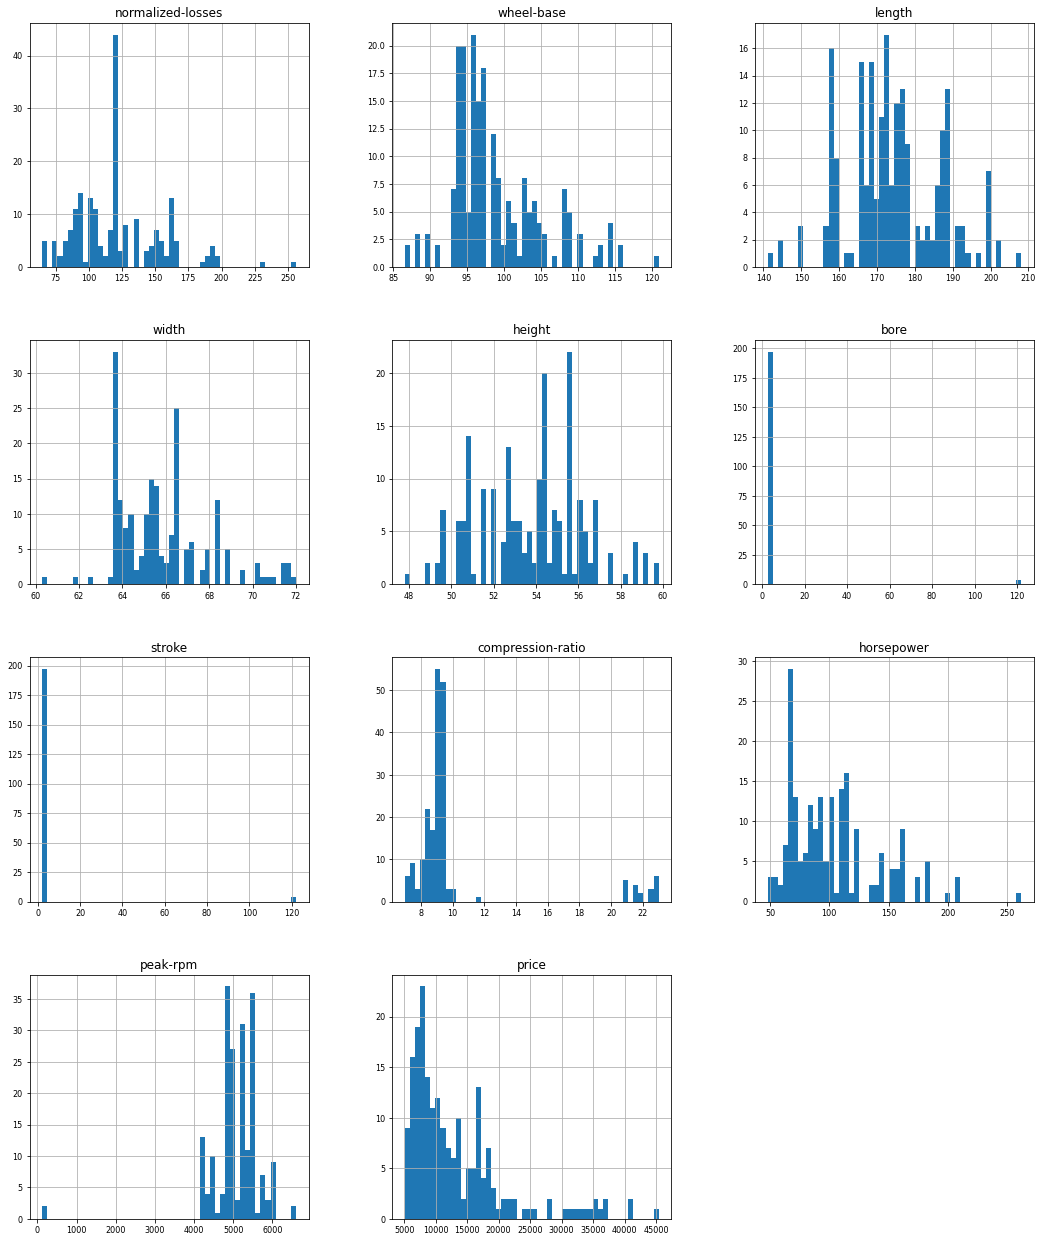

In [ ]:
dataset_numbers = dataset.select_dtypes(include=['float64', 'int'])

dataset_numbers.hist(figsize=(18,22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
# Feature Engineering

dataset['city-L/100km'] = 235 / dataset['city-mpg']
dataset['highway-L/100km'] = 235 / dataset['highway-mpg']


dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [ ]:
# Bining

dataset.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,5.692289,5.619950,10.164279,103.582090,5067.880597,25.179104,30.686567,13207.129353,9.944145,8.044957
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,16.616706,16.627881,4.004965,37.411422,689.686904,6.423220,6.815150,7947.066342,2.534599,1.840739
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,122.000000,13.000000,16.000000,5118.000000,4.795918,4.351852
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.000000,10295.000000,9.791667,7.833333
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.600000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,122.000000,122.000000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500


In [ ]:
print(min(dataset['horsepower']), max(dataset['horsepower']))

48 262


In [ ]:
bins = np.linspace(min(dataset['horsepower']), max(dataset['horsepower']), 4)

bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
group_names = ['horsepower-low', 'horsepower-medium', 'horsepower-high']
dataset['horsepower-categories'] = pd.cut(dataset['horsepower'], bins, labels=group_names, include_lowest=True)

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categories
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,horsepower-low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,horsepower-low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,horsepower-low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,horsepower-low


In [ ]:
# One-hot encoding

dataset['fuel-type'].value_counts()


gas       181
diesel     20
Name: fuel-type, dtype: int64

In [ ]:
fuel_categorized = pd.get_dummies(dataset['fuel-type'])

fuel_categorized

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [ ]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categories
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,horsepower-low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,horsepower-low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,horsepower-low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,horsepower-low


In [ ]:
dataset = pd.concat([dataset, fuel_categorized], axis=1)

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categories,diesel,gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,13495.0,11.190476,8.703704,horsepower-low,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,16500.0,11.190476,8.703704,horsepower-low,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-medium,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102,5500.0,24,30,13950.0,9.791667,7.833333,horsepower-low,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115,5500.0,18,22,17450.0,13.055556,10.681818,horsepower-low,0,1


In [ ]:
make_categorized = pd.get_dummies(dataset['make'])

make_categorized

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dataset = pd.concat([dataset, make_categorized], axis=1)

In [ ]:
cleanup_nums = {
    'num-of-doors': {
        'four': 4,
        'two': 2
    },
    'num-of-cylinders': {
        'four': 4,
        'six': 6,
        'five': 5,
        'eight': 8,
        'two': 2,
        'twelve': 12,
        'three': 3
    }
}

dataset.replace(cleanup_nums, inplace=True)
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,0,0,0
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,0,0,0
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,0,0,0,0,0,0,0,0,0,0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,0,0,0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset.dtypes

symboling                   int64
normalized-losses           int32
make                       object
fuel-type                  object
aspiration                 object
num-of-doors                int64
body-style                 object
drive-wheels               object
engine-location            object
wheel-base                float64
length                    float64
width                     float64
height                    float64
curb-weight                 int64
engine-type                object
num-of-cylinders            int64
 engine-size                int64
fuel-system                object
bore                      float64
stroke                    float64
compression-ratio         float64
horsepower                  int32
peak-rpm                  float64
city-mpg                    int64
highway-mpg                 int64
price                     float64
city-L/100km              float64
highway-L/100km           float64
horsepower-categories    category
diesel        

In [ ]:
dataset.drop(['make', 'city-mpg', 'highway-mpg'], axis=1, inplace=True)
dataset.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122,gas,std,2,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,122,gas,std,2,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,122,gas,std,2,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164,gas,std,4,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164,gas,std,4,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset.dtypes

symboling                   int64
normalized-losses           int32
fuel-type                  object
aspiration                 object
num-of-doors                int64
body-style                 object
drive-wheels               object
engine-location            object
wheel-base                float64
length                    float64
width                     float64
height                    float64
curb-weight                 int64
engine-type                object
num-of-cylinders            int64
 engine-size                int64
fuel-system                object
bore                      float64
stroke                    float64
compression-ratio         float64
horsepower                  int32
peak-rpm                  float64
price                     float64
city-L/100km              float64
highway-L/100km           float64
horsepower-categories    category
diesel                      uint8
gas                         uint8
alfa-romero                 uint8
audi          

In [ ]:
dataset.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122,gas,std,2,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,122,gas,std,2,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,122,gas,std,2,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164,gas,std,4,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164,gas,std,4,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
aspiration_categorized = pd.get_dummies(dataset['aspiration'])
body_style_categorized = pd.get_dummies(dataset['body-style'])
drive_wheels_categorized = pd.get_dummies(dataset['drive-wheels'])
engine_location_categorized = pd.get_dummies(dataset['engine-location'])
engine_type_categorized = pd.get_dummies(dataset['engine-type'])
fuel_system_categorized = pd.get_dummies(dataset['fuel-system'])
horsepower_categories_categorized = pd.get_dummies(dataset['horsepower-categories'])

In [ ]:
dataset.drop(['aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system', 'fuel-type', 'horsepower-categories'], axis=1, inplace=True)

In [ ]:
dataset = pd.concat([dataset, aspiration_categorized], axis=1)
dataset = pd.concat([dataset, body_style_categorized], axis=1)
dataset = pd.concat([dataset, drive_wheels_categorized], axis=1)
dataset = pd.concat([dataset, engine_location_categorized], axis=1)
dataset = pd.concat([dataset, engine_type_categorized], axis=1)
dataset = pd.concat([dataset, fuel_system_categorized], axis=1)
dataset = pd.concat([dataset, horsepower_categories_categorized], axis=1)

In [ ]:
dataset.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,horsepower-low,horsepower-medium,horsepower-high
0,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,1,0,0,1,0,0
1,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,1,0,0,1,0,0
2,1,122,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,0,0,0,1,0,0,0,1,0
3,2,164,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,1,0,0,1,0,0
4,2,164,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,1,0,0,1,0,0


array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'num-of-doors'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb-weight'}>],
       [<AxesSubplot:title={'center':'num-of-cylinders'}>,
        <AxesSubplot:title={'center':' engine-size'}>,
        <AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'peak-rpm'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'city-L/100km'}>,
        <AxesSubplot:title={'center':'highway-L/100km'}>,
        <AxesSubplot:title={'center':'diese

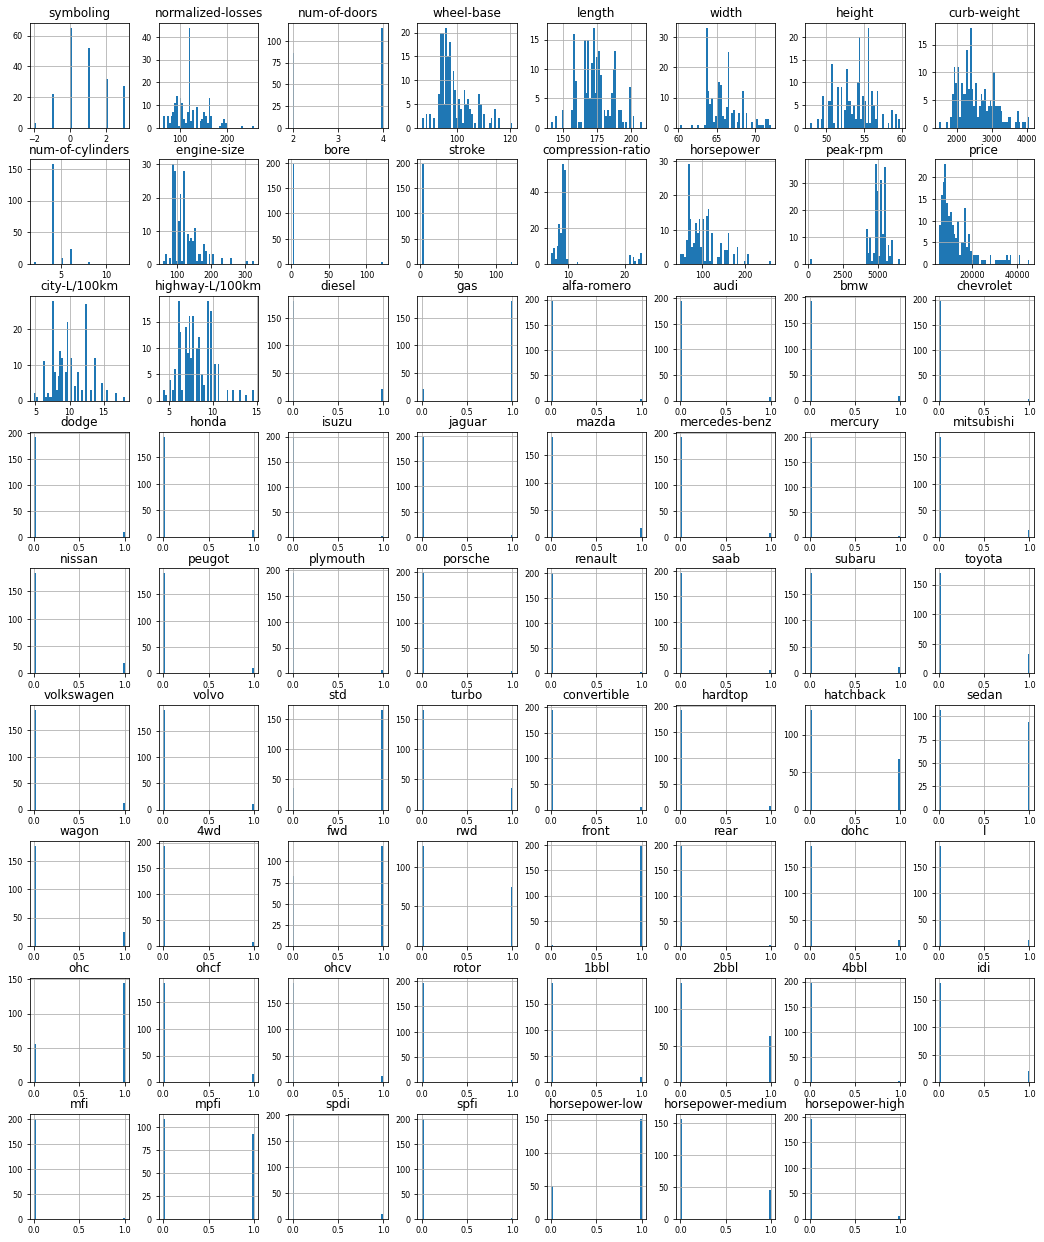

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
corr = dataset.corr()['price'].sort_values(ascending=False)
corr_df = pd.DataFrame({'Column':corr.index, 'Correlation with price': corr.values})
corr_df

,Column,Correlation with price
0,price,1.000000
1,engine-size,0.872335
2,curb-weight,0.834415
3,horsepower,0.806429
4,highway-L/100km,0.801118
...,...,...
66,front,-0.331062
67,ohc,-0.332851
68,2bbl,-0.497825
69,fwd,-0.595979


In [ ]:
dataset.dtypes

symboling              int64
normalized-losses      int32
num-of-doors           int64
wheel-base           float64
length               float64
                      ...   
spdi                   uint8
spfi                   uint8
horsepower-low         uint8
horsepower-medium      uint8
horsepower-high        uint8
Length: 71, dtype: object

Nomor 01

In [ ]:
label = dataset['price']
feature = dataset.drop(['price'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler

scale = ["StandardScaler", # "PowerTransformer (Method=Yoe-Johnson)",
"QuantileTransformer", "MixMaxScaler", "MaxAbsScaler", "RobustScaler", "PowerTransformer (Method=Box-Cox)"]

scaler = [ StandardScaler(),
# PowerTransformer(method='yeo-johnson'),
QuantileTransformer(output_distribution='normal'),
MinMaxScaler(copy=True),
MaxAbsScaler(copy=True),
RobustScaler(with_centering=True, with_scaling=True, quantile_range=(0.25, 0.75),copy=True),
StandardScaler(),PowerTransformer(method='box-cox')]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def housescaler(name, scaling):
    for n in range(len(name)):
        feature_s = scaling[n].fit_transform(feature.values)
        label_s = scaling[n].fit_transform(dataset['price'].values.reshape(-1,1)).flatten()

        feature_train, feature_test, label_train, label_test = train_test_split(feature_s, label_s, test_size=0.25, random_state=10)

        lm = LinearRegression()
        lm.fit(feature_train, label_train)

        predictions = lm.predict(feature_test)

        mse = mean_squared_error(label_test, predictions)
        mae = mean_absolute_error(label_test, predictions)
        r2 = r2_score(label_test, predictions)
        print(name[n])
        print("MSE (Mean Squared Error) : ", round(mse,3))
        print("MAE (Mean Absolute Error) : ", round(mae,3))
        print("r^2 score : ", round(r2,3))
        print("RMSE (Root Maen Squared Error) : ", round(np.sqrt(mse),3))
        print("Nilai SI (Scatter Index) : ", round(np.sqrt(mse)/mae, 3))
        print("\n")
    return

In [ ]:
housescaler(scale,scaler)

StandardScaler
MSE (Mean Squared Error) :  7.576440267589318e+23
MAE (Mean Absolute Error) :  211610904665.452
r^2 score :  -1.1213273549668722e+24
RMSE (Root Maen Squared Error) :  870427496554.958
Nilai SI (Scatter Index) :  4.113


QuantileTransformer
MSE (Mean Squared Error) :  3.9537925331679367e+24
MAE (Mean Absolute Error) :  537804221698.862
r^2 score :  -4.67927804932166e+24
RMSE (Root Maen Squared Error) :  1988414577790.038
Nilai SI (Scatter Index) :  3.697


MixMaxScaler
MSE (Mean Squared Error) :  0.741
MAE (Mean Absolute Error) :  0.169
r^2 score :  -27.336
RMSE (Root Maen Squared Error) :  0.861
Nilai SI (Scatter Index) :  5.09


MaxAbsScaler
MSE (Mean Squared Error) :  4.487114420902517e+21
MAE (Mean Absolute Error) :  14742905389.982
r^2 score :  -2.178203481864668e+23
RMSE (Root Maen Squared Error) :  66985927036.225
Nilai SI (Scatter Index) :  4.544


RobustScaler
MSE (Mean Squared Error) :  811691.057
MAE (Mean Absolute Error) :  177.007
r^2 score :  -27.336
RMSE (R

Dari data ini, dapat dilihat bahwa r^2 yang dihasilkan dari setiap data processing memiliki nilai minus. Hal ini juga menunjukan data hanya di uji pada Linear Regression, menandakan bahwa linear regression sendiri yang tidak cocok pada data kali ini.

MSE (Mean Squared Error) :  0.0
MAE (Mean Absolute Error) :  0.0
r^2 score :  1.0
RMSE (Root Maen Squared Error) :  0.0
Nilai SI (Scatter Index) :  nan


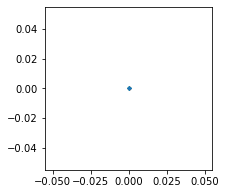

In [ ]:
scaler = PowerTransformer(method='yeo-johnson')

feature_s = scaler.fit_transform(feature.values)
label_s = scaler.fit_transform(dataset['price'].values.reshape(-1,1)).flatten()

feature_train, feature_test, label_train, label_test = train_test_split(feature_s, label_s, test_size=0.25, random_state=10)

lm = LinearRegression()
lm.fit(feature_train, label_train)
predictions = lm.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error) : ", round(mse,3))
print("MAE (Mean Absolute Error) : ", round(mae,3))
print("r^2 score : ", round(r2,3))
print("RMSE (Root Maen Squared Error) : ", round(np.sqrt(mse),3))
print("Nilai SI (Scatter Index) : ", round(np.sqrt(mse)/mae, 3))

plt.figure(figsize=(3,3))
plt.scatter(label_test, predictions, 5)
plt.show()


Pada data processing PowerTranformer(Yoe-Johnson) nilai r^2 adalah 1, namun MSE, MAE, RMSE adalah 0. Ketika dilihat persebaran datanya menggunakan scatter plot, data hanya berbentuk 1 titik. Data tidak dapat dihitung menggunakan algoritma PowerTranformer(Yoe-Johnson) dan Linear Regression

Nomor 02

In [ ]:
label = dataset['price']
feature = dataset.drop(['price'], axis=1)

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = MaxAbsScaler(copy=True)

feature_s = scaler.fit_transform(feature.values)
label_s = scaler.fit_transform(dataset['price'].values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature_s, label_s, test_size=0.25, random_state=10)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
nameReg = ["RandomForestRegressor (n=10)", "RandomForestRegressor (n=25)", "RandomForestRegressor (n=50)", "RandomForestRegressor (n=75)", "XGBRegressor", "SVM (rbf)", "SVM (linear)", "SVM (poly)", "KNeigbhorsRegressor (k=1)",  "KNeigbhorsRegressor (k=3)",  "KNeigbhorsRegressor (k=5)",  "KNeigbhorsRegressor (k=7)",  "KNeigbhorsRegressor (k=9)",  "KNeigbhorsRegressor (k=11)",  "KNeigbhorsRegressor (k=13)",  "KNeigbhorsRegressor (k=15)"]

regressor = [ RandomForestRegressor(n_estimators=10, max_depth=5),
RandomForestRegressor(n_estimators=25, max_depth=5),
RandomForestRegressor(n_estimators=50, max_depth=5),
RandomForestRegressor(n_estimators=75, max_depth=5),
xgb.XGBRegressor(max_depth=4, learning_rate=0.22),
SVR(kernel='rbf', gamma=0.1, epsilon=.1),
SVR(kernel='linear', gamma='auto'),
SVR(kernel='poly', gamma='auto', degree=3, epsilon=.1, coef0=1),
KNeighborsRegressor(n_neighbors=1),
KNeighborsRegressor(n_neighbors=3),
KNeighborsRegressor(n_neighbors=5),
KNeighborsRegressor(n_neighbors=7),
KNeighborsRegressor(n_neighbors=9),
KNeighborsRegressor(n_neighbors=11),
KNeighborsRegressor(n_neighbors=13),
KNeighborsRegressor(n_neighbors=15)]

In [ ]:
def regress(name, reg):
    for n in range(len(name)):
        rr = reg[n]
        rr.fit(feature_train, label_train)
        # print(name[n], reg[n])
        predictions = rr.predict(feature_test)

        mse = mean_squared_error(label_test, predictions)
        mae = mean_absolute_error(label_test, predictions)
        r2 = r2_score(label_test, predictions)
        print(name[n])
        print("MSE (Mean Squared Error) : ", round(mse,3))
        print("MAE (Mean Absolute Error) : ", round(mae,3))
        print("r^2 score : ", round(r2,3))
        print("RMSE (Root Maen Squared Error) : ", round(np.sqrt(mse),3))
        print("Nilai SI (Scatter Index) : ", round(np.sqrt(mse)/mae, 3))
        print("\n")
    return

In [ ]:
regress(nameReg, regressor)

RandomForestRegressor (n=10)
MSE (Mean Squared Error) :  0.002
MAE (Mean Absolute Error) :  0.031
r^2 score :  0.913
RMSE (Root Maen Squared Error) :  0.042
Nilai SI (Scatter Index) :  1.369


RandomForestRegressor (n=25)
MSE (Mean Squared Error) :  0.002
MAE (Mean Absolute Error) :  0.028
r^2 score :  0.926
RMSE (Root Maen Squared Error) :  0.039
Nilai SI (Scatter Index) :  1.405


RandomForestRegressor (n=50)
MSE (Mean Squared Error) :  0.001
MAE (Mean Absolute Error) :  0.028
r^2 score :  0.928
RMSE (Root Maen Squared Error) :  0.038
Nilai SI (Scatter Index) :  1.367


RandomForestRegressor (n=75)
MSE (Mean Squared Error) :  0.002
MAE (Mean Absolute Error) :  0.03
r^2 score :  0.919
RMSE (Root Maen Squared Error) :  0.041
Nilai SI (Scatter Index) :  1.364


XGBRegressor
MSE (Mean Squared Error) :  0.001
MAE (Mean Absolute Error) :  0.026
r^2 score :  0.93
RMSE (Root Maen Squared Error) :  0.038
Nilai SI (Scatter Index) :  1.432


SVM (rbf)
MSE (Mean Squared Error) :  0.006
MAE (Mean

Data diatas yang sebelumnya di uji menggunakan linear regression, menghasilkan r^2 yang minus. Namun kali ini ketika di coba menggunakan algoritma regression yang lain, menghasilkan r^2 score pada angka 0,93 di XGBRegressor dan kisaran angka 0,913-0,928 pada Random Forest Regressor. Tapi untuk nilai RMSE sendiri dimiliki oleh SVM(linear) pada perbandingan RMSE:MAE = 1,197 dan r^2 =0,758